# Data exploration

In [2]:
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sqlite3           as sql

In [3]:
conn = sql.connect("../selenium/news.db")
cur  = conn.cursor()

In [4]:
conn1 = sql.connect("../news/news.db")

In [23]:
newspapers = {'globo': globo,
    'correio': correio,
    'minas' : minas,
    'ig': ig,
    'uol': uol}

In [15]:
for key, value in newspapers.items():
    print(key, len(value))

globo 941
correio 241
minas 1337
ig 176
uol 514


In [5]:
globo = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM g1 GROUP BY day;",
    conn1,
    index_col = 'day',
    parse_dates = ['day'])

In [6]:
correio = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM correio2 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

In [22]:
minas = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM minas7 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])
minas = minas[minas['volume'] < 1000]

In [8]:
ig = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM ig GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

In [9]:
uol = pd.read_sql_query("SELECT date(date) AS day, COUNT(*) AS volume FROM uol6 GROUP BY day;",
    conn,
    index_col = 'day',
    parse_dates = ['day'])

[]

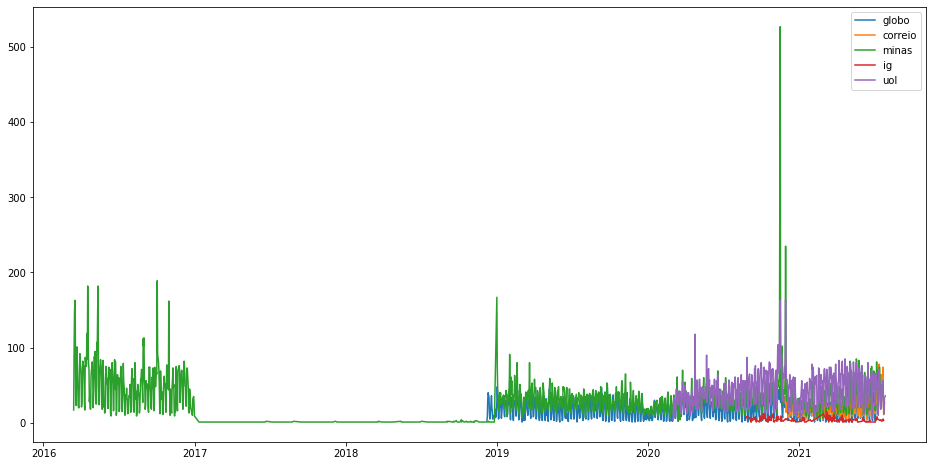

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
#fmt_half_year = mdates.MonthLocator(interval=6)
#ax.xaxis.set_major_locator(fmt_half_year)
#fmt_month = mdates.MonthLocator()
#ax.xaxis.set_minor_locator(fmt_month)
for key, value in newspapers.items():
    plt.plot(value,label=key)
plt.legend()
plt.plot()

In [65]:
minasglobo = minas + globo

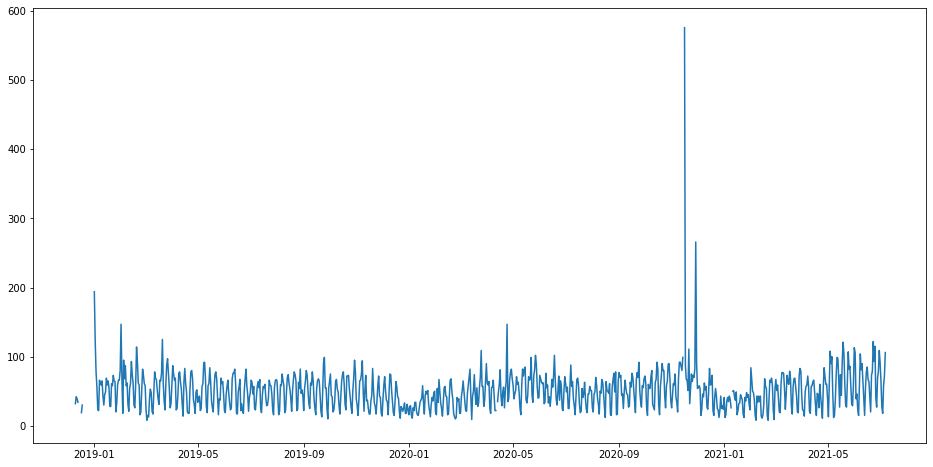

In [66]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(minasglobo)
plt.show()